<a href="https://colab.research.google.com/github/Varstzeiin/Project-2-Rekomendasi-Kopi/blob/main/MODEL_RECOMENDATION_Hell's_Kitchen_LOC_PROJECT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODEL FOR PROJECT**

## **HELLS KITCHEN LOCATION**

### Install MLxtend library

In [ ]:
pip install -u mlxtend


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


### Import Library

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import numpy as np

### Import Library

In [ ]:
df_hk = pd.read_excel('/content/iNVOICE ID hell_kitchen.xlsx')
df_hk = df_hk.drop(columns=["invoice_id","product_id", "store_id", "unit_price", "Month", "Month.1", "Revenue", "Weekday.1", "Weekday", "Hour"])

In [ ]:
df_hk['product_detail'] = df_hk['product_detail'].str.strip()
df_hk.dropna(axis = 0, subset = ['new_invoice_id'], inplace = True)
df_hk['new_invoice_id'] = df_hk['new_invoice_id'].astype('str')
df_hk = df_hk[~df_hk['new_invoice_id'].str.contains('C')]

In [ ]:
df_hk

,transaction_datetime,transaction_qty,store_location,product_category,product_type,product_detail,new_invoice_id
0,2023-01-01 08:17:27,2,Hell's Kitchen,Coffee,Gourmet brewed coffee,Ethiopia Lg,INV00001
1,2023-01-01 08:31:23,1,Hell's Kitchen,Coffee,Barista Espresso,Cappuccino,INV00002
2,2023-01-01 08:41:57,2,Hell's Kitchen,Coffee,Barista Espresso,Cappuccino,INV00003
3,2023-01-01 08:52:03,1,Hell's Kitchen,Coffee,Barista Espresso,Latte,INV00004
4,2023-01-01 09:00:24,2,Hell's Kitchen,Coffee,Barista Espresso,Cappuccino,INV00004
...,...,...,...,...,...,...,...
20182,2023-06-30 19:19:20,1,Hell's Kitchen,Coffee,Premium brewed coffee,Jamaican Coffee River Rg,INV04391
20183,2023-06-30 19:39:19,1,Hell's Kitchen,Coffee,Gourmet brewed coffee,Ethiopia Sm,INV04392
20184,2023-06-30 19:46:28,1,Hell's Kitchen,Coffee,Organic brewed coffee,Brazilian Lg,INV04392
20185,2023-06-30 19:56:45,1,Hell's Kitchen,Coffee,Gourmet brewed coffee,Ethiopia Lg,INV04393


### Model

In [ ]:
basket = (df_hk
          .groupby(['new_invoice_id', 'product_detail'])['transaction_qty']
          .sum().unstack().reset_index().fillna(0)
          .set_index('new_invoice_id'))

In [ ]:
basket

product_detail,Brazilian Lg,Brazilian Rg,Brazilian Sm,Cappuccino,Cappuccino Lg,Columbian Medium Roast Lg,Columbian Medium Roast Rg,Columbian Medium Roast Sm,Espresso shot,Ethiopia Lg,...,Ethiopia Sm,Jamaican Coffee River Lg,Jamaican Coffee River Rg,Jamaican Coffee River Sm,Latte,Latte Rg,Our Old Time Diner Blend Lg,Our Old Time Diner Blend Rg,Our Old Time Diner Blend Sm,Ouro Brasileiro shot
new_invoice_id,,,,,,,,,,,,,,,,,,,,,
INV00001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
INV00002,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
INV00003,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
INV00004,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
INV00005,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INV04390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
INV04391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
INV04392,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

<ipython-input-8-fca9b50fcc17>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


In [ ]:
basket_sets

product_detail,Brazilian Lg,Brazilian Rg,Brazilian Sm,Cappuccino,Cappuccino Lg,Columbian Medium Roast Lg,Columbian Medium Roast Rg,Columbian Medium Roast Sm,Espresso shot,Ethiopia Lg,...,Ethiopia Sm,Jamaican Coffee River Lg,Jamaican Coffee River Rg,Jamaican Coffee River Sm,Latte,Latte Rg,Our Old Time Diner Blend Lg,Our Old Time Diner Blend Rg,Our Old Time Diner Blend Sm,Ouro Brasileiro shot
new_invoice_id,,,,,,,,,,,,,,,,,,,,,
INV00001,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
INV00002,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
INV00003,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
INV00004,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
INV00005,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INV04390,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
INV04391,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
INV04392,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
basket_sets.to_excel('basket_sets_hells_Kitechen.xlsx', index=False)

In [ ]:
# Convert basket to boolean format
basket_sets.astype(bool)

product_detail,Brazilian Lg,Brazilian Rg,Brazilian Sm,Cappuccino,Cappuccino Lg,Columbian Medium Roast Lg,Columbian Medium Roast Rg,Columbian Medium Roast Sm,Espresso shot,Ethiopia Lg,...,Ethiopia Sm,Jamaican Coffee River Lg,Jamaican Coffee River Rg,Jamaican Coffee River Sm,Latte,Latte Rg,Our Old Time Diner Blend Lg,Our Old Time Diner Blend Rg,Our Old Time Diner Blend Sm,Ouro Brasileiro shot
new_invoice_id,,,,,,,,,,,,,,,,,,,,,
INV00001,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
INV00002,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
INV00003,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
INV00004,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,True,False,False
INV00005,False,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INV04390,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
INV04391,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
INV04392,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [ ]:
# Apply apriori with minimum support
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
print(f"Frequent Itemsets Found: {len(frequent_itemsets)}")
# Menampilkan rata-rata nilai support
average_support = frequent_itemsets['support'].mean()
print(f"Average Support: {average_support}")
# Mengurutkan frequent itemsets berdasarkan support secara ascending
frequent_itemsets_sorted = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets_sorted

Frequent Itemsets Found: 120
Average Support: 0.0731186466393567


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
20,0.208921,(Ouro Brasileiro shot)
0,0.176832,(Brazilian Lg)
9,0.175467,(Ethiopia Lg)
19,0.171370,(Our Old Time Diner Blend Sm)
1,0.170232,(Brazilian Rg)
...,...,...
48,0.050296,"(Columbian Medium Roast Rg, Brazilian Sm)"
67,0.050068,"(Cappuccino Lg, Ethiopia Rg)"
96,0.050068,"(Jamaican Coffee River Lg, Ethiopia Rg)"
52,0.050068,"(Jamaican Coffee River Lg, Brazilian Sm)"


In [ ]:
frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(frozenset)

In [ ]:
rules= association_rules(frequent_itemsets, metric='lift', min_threshold=0.7, support_only=False)

# Print or display the rules
if rules.empty:
    print("aturan asosiasi ga itemukan. Coba kau kurangi kurangi sikit itu nilai min_support atau min_threshold nya.")
else:
    print(rules.head())

      antecedents     consequents  antecedent support  consequent support  \
0  (Brazilian Rg)  (Brazilian Lg)            0.170232            0.176832   
1  (Brazilian Lg)  (Brazilian Rg)            0.176832            0.170232   
2  (Brazilian Lg)  (Brazilian Sm)            0.176832            0.168867   
3  (Brazilian Sm)  (Brazilian Lg)            0.168867            0.176832   
4    (Cappuccino)  (Brazilian Lg)            0.165908            0.176832   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.056668    0.332888  1.882508               1.0  0.026566    1.233927   
1  0.056668    0.320463  1.882508               1.0  0.026566    1.221079   
2  0.054848    0.310167  1.836759               1.0  0.024986    1.204833   
3  0.054848    0.324798  1.836759               1.0  0.024986    1.219143   
4  0.055985    0.337449  1.908300               1.0  0.026648    1.242421   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.564970  0.19

In [ ]:
# Sorting rules by lift to identify the best associations
rules = rules.sort_values(by='lift', ascending=False)
#ratarata lift
average_rules = rules['lift'].mean()
print(f"Average Lift of Hell's Kitchen: {average_rules}")
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

Average Lift of Hell's Kitchen: 1.909373477903324


,antecedents,consequents,support,confidence,lift
169,(Our Old Time Diner Blend Lg),(Jamaican Coffee River Rg),0.053482,0.339595,2.372309
168,(Jamaican Coffee River Rg),(Our Old Time Diner Blend Lg),0.053482,0.373609,2.372309
68,(Brazilian Sm),(Our Old Time Diner Blend Lg),0.057351,0.339623,2.156506
69,(Our Old Time Diner Blend Lg),(Brazilian Sm),0.057351,0.364162,2.156506
191,(Our Old Time Diner Blend Lg),(Our Old Time Diner Blend Sm),0.058034,0.368497,2.150301
...,...,...,...,...,...
149,(Ouro Brasileiro shot),(Ethiopia Lg),0.058716,0.281046,1.601706
135,(Ouro Brasileiro shot),(Espresso shot),0.051661,0.247277,1.563358
134,(Espresso shot),(Ouro Brasileiro shot),0.051661,0.326619,1.563358
178,(Latte),(Ouro Brasileiro shot),0.051434,0.309589,1.481846


# **IMPLEMENTASI**

In [ ]:
# Real-time input function for recommendations
def recommend_products_interactive(rules, top_n=3):
    while True:
        print("\n--- Coffee Product Recommendation System ---")
        selected_products = input("Enter purchased product(s) separated by commas (or type 'exit' to quit): ").strip()
        if selected_products.lower() == 'exit':
            print("Exiting the system. Have a great day!")
            break
        selected_products = [product.strip() for product in selected_products.split(',')]

        # Generate recommendations
        recommendations = []
        for product in selected_products:
            for _, row in rules.iterrows():
                if product in row['antecedents']:
                    recommendations.extend(list(row['consequents']))
        recommendations = list(set(recommendations) - set(selected_products))  # Exclude already selected

        if recommendations:
            print(f"Recommendations based on your selection: {recommendations[:top_n]}")
        else:
            print("No recommendations found for the selected product(s).")

# contoh penggunaan
recommend_products_interactive(rules)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



--- Coffee Product Recommendation System ---
Enter purchased product(s) separated by commas (or type 'exit' to quit): Latte
Recommendations based on your selection: ['Brazilian Lg', 'Ouro Brasileiro shot', 'Our Old Time Diner Blend Sm']

--- Coffee Product Recommendation System ---
Enter purchased product(s) separated by commas (or type 'exit' to quit): exit
Exiting the system. Have a great day!


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


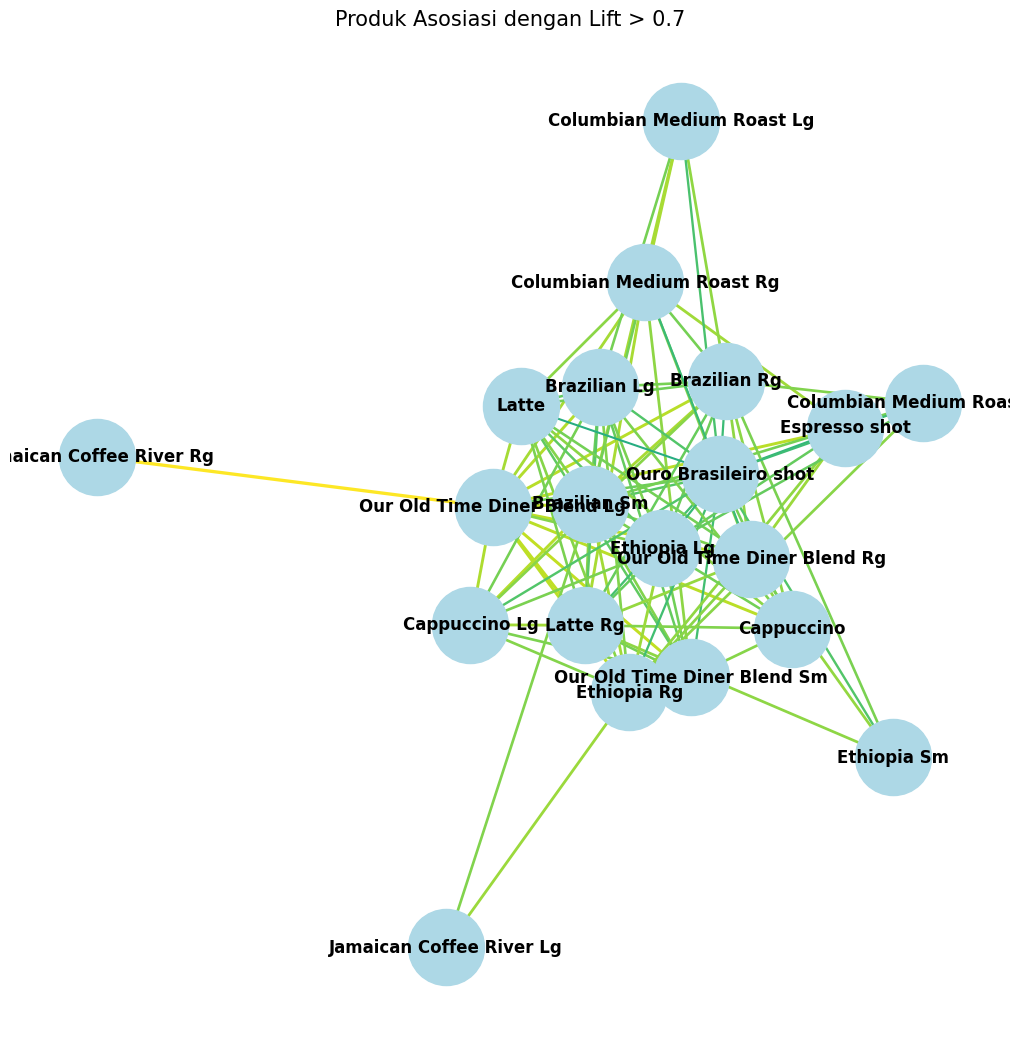

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np

# Filter aturan asosiasi dengan lift > 0.7
filtered_rules = rules[rules['lift'] > 0.7]

# Buat Graph dari NetworkX untuk visualisasi asosiasi
G = nx.Graph()

# Menambahkan nodes (produk) dan edges (asosiasi antara produk)
for index, row in filtered_rules.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            lift = row['lift']
            # Set the edge weight based on lift value
            G.add_edge(str(antecedent), str(consequent), weight=lift)

# Visualisasi Network Graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # Layout posisi node

# Get the lift values to map color and thickness
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(edge_weights)

# Color edges based on the lift value, use a colormap for color variation
edge_colors = plt.cm.viridis(np.array(edge_weights) / max_weight)

# Draw the graph with varying edge thickness and color
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold', edge_color=edge_colors, width=edge_weights)

# Title
plt.title('Produk Asosiasi dengan Lift > 0.7', fontsize=15)
plt.show()


In [ ]:
# Kesimpulan rekomendasi
print("The top associations have been identified. Use the recommendation system to suggest products to customers in real-time.")

The top associations have been identified. Use the recommendation system to suggest products to customers in real-time.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
